# Análise de Dados de Student Performance

Base de Dados
Cortez, Paulo. 2008. Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

Paper
Cortez, P. and A. M. Gonçalves Silva. “Using data mining to predict secondary school student performance.” (2008).


## Características dos Dados

1 school - escola do estudante (binário: "GP" - Gabriel Pereira ou "MS" - Mousinho da Silveira)<br />
2 sex - sexo do estudante (binário: "F" - feminino ou "M" - masculino)<br />
3 age - idade do estudante (numérico: de 15 a 22)<br />
4 address - tipo de endereço residencial do estudante (binário: "U" - urbano ou "R" - rural)<br />
5 famsize - tamanho da família (binário: "LE3" - menor ou igual a 3 ou "GT3" - maior que 3)<br />
6 Pstatus - status de coabitação dos pais (binário: "T" - vivendo juntos ou "A" - separados)<br />
7 Medu - escolaridade da mãe (numérico: 0 - nenhuma, 1 - ensino primário (4ª série), 2 - 5ª a 9ª série, 3 - ensino médio ou 4 - ensino superior)<br />
8 Fedu - escolaridade do pai (numérico: 0 - nenhuma, 1 - ensino primário (4ª série), 2 - 5ª a 9ª série, 3 - ensino médio ou 4 - ensino superior)<br />
9 Mjob - profissão da mãe (nominal: "professora", relacionada à "saúde", serviços "civis" (ex.: administrativo ou policial), "em_casa" ou "outro")<br />
10 Fjob - profissão do pai (nominal: "professor", relacionada à "saúde", serviços "civis" (ex.: administrativo ou policial), "em_casa" ou "outro")<br />
11 reason - motivo para escolher esta escola (nominal: próximo de "casa", "reputação" da escola, preferência pelo "curso" ou "outro")<br />
12 guardian - responsável pelo estudante (nominal: "mãe", "pai" ou "outro")<br />
13 traveltime - tempo de viagem de casa para a escola (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, ou 4 - >1 hora)<br />
14 studytime - tempo semanal de estudo (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas)<br />
15 failures - número de reprovações anteriores (numérico: n se 1<=n<3, caso contrário 4)<br />
16 schoolsup - suporte educacional extra (binário: sim ou não)<br />
17 famsup - suporte educacional familiar (binário: sim ou não)<br />
18 paid - aulas extras pagas dentro da disciplina do curso (Matemática ou Português) (binário: sim ou não)<br />
19 activities - atividades extracurriculares (binário: sim ou não)<br />
20 nursery - frequentou escola infantil (binário: sim ou não)<br />
21 higher - deseja cursar ensino superior (binário: sim ou não)<br />
22 internet - acesso à Internet em casa (binário: sim ou não)<br />
23 romantic - em um relacionamento amoroso (binário: sim ou não)<br />
24 famrel - qualidade das relações familiares (numérico: de 1 - muito ruim a 5 - excelente)<br />
25 freetime - tempo livre após a escola (numérico: de 1 - muito baixo a 5 - muito alto)<br />
26 goout - sair com amigos (numérico: de 1 - muito baixo a 5 - muito alto)<br />
27 Dalc - consumo de álcool durante a semana (numérico: de 1 - muito baixo a 5 - muito alto)<br />
28 Walc - consumo de álcool no final de semana (numérico: de 1 - muito baixo a 5 - muito alto)<br />
29 health - estado atual de saúde (numérico: de 1 - muito ruim a 5 - muito bom)<br />
30 absences - número de faltas escolares (numérico: de 0 a 93)<br />

## Importações de bibliotecas

In [1]:
# Importação de bibliotecas para análise de dados
import pandas as pd
import numpy as np

# Importação de bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Importação de bibliotecas do sklearn para classificação
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Leitura do arquivo em CSV

In [2]:
# Leitura do dataset student-mat.csv em csv
df = pd.read_csv('student-mat.csv', sep=';')
# Exibição das 5 primeiras linhas do dataset
print(df.head())
# Exibição das informações do dataset
print(df.info())
# Exibição das estatísticas descritivas do dataset
print(df.describe())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

## Tratamento dos Dados

### Identificar valores nulos

In [3]:
# Identificar valores nulos e contar
null_values = df.isnull().sum()
print(null_values[null_values > 0])  # Exibir apenas colunas com valores nulos

Series([], dtype: int64)


### Identificar valores categóricos

In [4]:
# Lista com colunas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Exibir colunas categóricas
print(categorical_cols)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


Aplicar one-hot enconding

In [5]:
df = pd.get_dummies(df, columns=categorical_cols)
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


#### Criar coluna pass_fail

In [6]:
# Criar coluna pass_fail com base na regra, se G3 >= 10, então 'pass', caso contrário 'fail'
df['pass_fail'] = np.where(df['G3'] >= 10, 'pass', 'fail')
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,pass_fail
0,18,4,4,2,2,0,4,3,4,1,...,False,False,True,False,True,True,False,True,False,fail
1,17,1,1,1,2,0,5,3,3,1,...,False,True,False,False,True,False,True,True,False,fail
2,15,1,1,1,2,3,4,3,2,2,...,False,False,True,False,True,False,True,True,False,pass
3,15,4,2,1,3,0,3,2,2,1,...,True,False,True,False,True,False,True,False,True,pass
4,16,3,3,1,2,0,4,3,2,1,...,False,False,True,False,True,True,False,True,False,pass


In [7]:
# Exibir a contagem de valores únicos na coluna pass_fail
print(df['pass_fail'].value_counts())

pass_fail
pass    265
fail    130
Name: count, dtype: int64


## Análise dos dados

### Correlação entre as notas

Calcular a correlação entre G1, G2 e G3 e apresentar o resultado em gráfico de calor e analisar os resultados

          G1        G2        G3
G1  1.000000  0.852118  0.801468
G2  0.852118  1.000000  0.904868
G3  0.801468  0.904868  1.000000


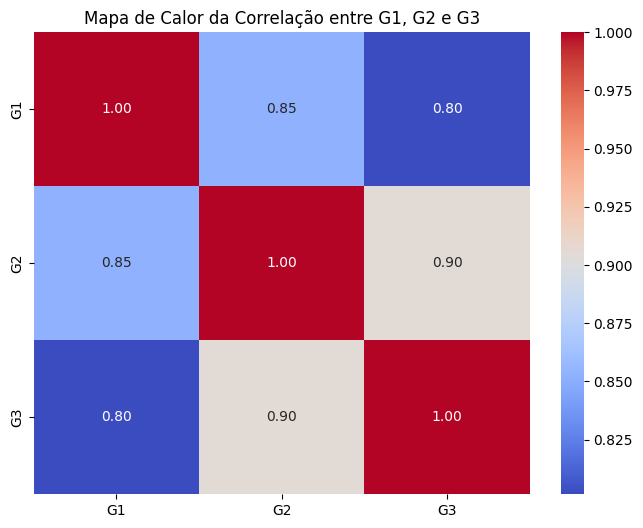

In [8]:
# Calcular a correlação entre as variáveis G1, G2 e G3
correlation = df[['G1', 'G2', 'G3']].corr()

# Exibir a matriz de correlação
print(correlation)
# Visualizar a matriz de correlação como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor da Correlação entre G1, G2 e G3')
plt.show()

Nota média por tempo de estudo (study time) - *Chat

   studytime         G3
0          1  10.047619
1          2  10.171717
2          3  11.400000
3          4  11.259259


C:\Users\mrafael\AppData\Local\Temp\ipykernel_24992\3453807887.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='studytime', y='G3', data=mean_g3_studytime, palette='viridis')


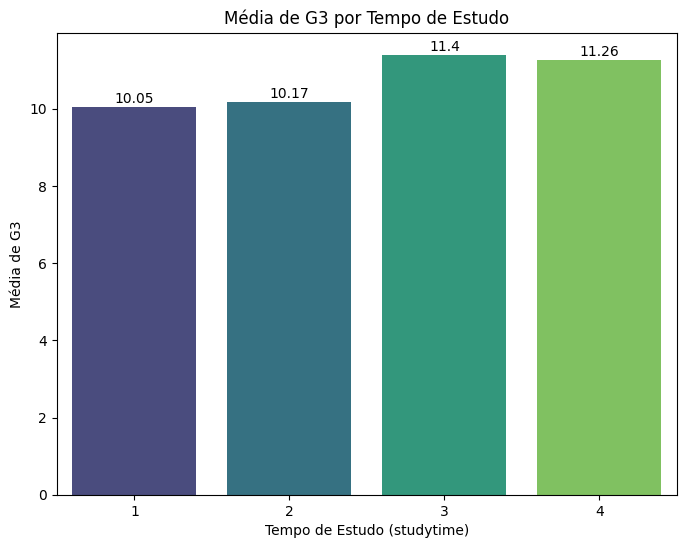

In [9]:
# Calcular a nota média de G3 com base no tempo de estudo (studytime)
mean_g3_studytime = df.groupby('studytime')['G3'].mean().reset_index()
# Exibir a média de G3 por tempo de estudo
print(mean_g3_studytime)
# Visualizar a média de G3 por tempo de estudo com valores nas colunas
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='studytime', y='G3', data=mean_g3_studytime, palette='viridis')

# Adicionar os valores de cada média nas colunas
for index, row in mean_g3_studytime.iterrows():
    ax.text(row['studytime'] - 1, row['G3'] + 0.1, round(row['G3'], 2), color='black', ha="center")

plt.title('Média de G3 por Tempo de Estudo')
plt.xlabel('Tempo de Estudo (studytime)')
plt.ylabel('Média de G3')
plt.show()

# Feature Selection
Mutual info classification do sklearn

In [10]:
from sklearn.feature_selection import mutual_info_classif

# Separar as features (X) e a variável alvo (y)
X = df.drop(columns=['G3', 'pass_fail'])  # Remover a coluna G3
y = df['G3']

# Calcular a importância das features usando mutual_info_classif
mutual_info = mutual_info_classif(X, y, random_state=42)

# Criar um DataFrame para organizar os resultados
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': mutual_info
})

# Ordenar as features pela importância e selecionar as 10 mais importantes
top_features = feature_importance.sort_values(by='Importance', ascending=False).head(10)

# Exibir as 10 features mais importantes
print(top_features)

            Feature  Importance
14               G2    1.385437
13               G1    0.743500
42     schoolsup_no    0.237862
53       higher_yes    0.212542
12         absences    0.194671
3        traveltime    0.174447
15        school_GP    0.167402
5          failures    0.162133
56      romantic_no    0.157449
40  guardian_mother    0.138692
